In [3]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import LatentDirichletAllocation, NMF
import numpy as np
import scipy.sparse as sp

In [4]:
# Load the dataset
file_path = "C:\\Users\\PRANAY\\Downloads\\train_data.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Display basic information about the dataset
print(data.info())

# Check the distribution of sentiment categories
print(data['sentiment'].value_counts())


                                 Name of the product Product Brand  \
0  All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi...        Amazon   
1        Amazon - Echo Plus w/ Built-In Hub - Silver        Amazon   
2  Amazon Echo Show Alexa-enabled Bluetooth Speak...        Amazon   
3  Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...        Amazon   
4  Brand New Amazon Kindle Fire 16gb 7" Ips Displ...        Amazon   

                                          categories  \
0  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1  Amazon Echo,Smart Home,Networking,Home & Tools...   
2  Amazon Echo,Virtual Assistant Speakers,Electro...   
3  eBook Readers,Fire Tablets,Electronics Feature...   
4  Computers/Tablets & Networking,Tablets & eBook...   

             primaryCategories              reviews.date  \
0                  Electronics  2016-12-26T00:00:00.000Z   
1         Electronics,Hardware  2018-01-17T00:00:00.000Z   
2         Electronics,Hardware  2017-12-20T00:00:00.000Z   
3 

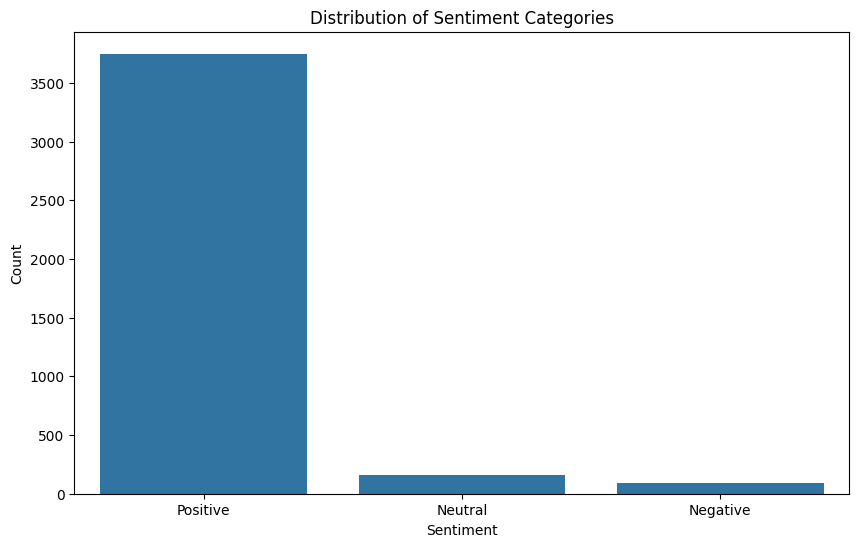

In [5]:
# Visualize the distribution of sentiment categories
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=data)
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [6]:
# Separate features and labels
X = data['reviews.text']
y = data['sentiment']

# Convert text data to numeric using TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Apply SMOTE to balance the classes
smote = SMOTE()
X_balanced, y_balanced = smote.fit_resample(X_tfidf, y)

# Display the distribution of balanced classes
print(pd.Series(y_balanced).value_counts())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)


sentiment
Positive    3749
Neutral     3749
Negative    3749
Name: count, dtype: int64


In [7]:
# Train and evaluate Multinomial Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
print("Multinomial Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
y_proba = nb_model.predict_proba(X_test)
print("AUC-ROC Score:", roc_auc_score(y_test, y_proba, multi_class='ovr'))

Multinomial Naive Bayes Accuracy: 0.9613333333333334
              precision    recall  f1-score   support

    Negative       0.96      1.00      0.98       748
     Neutral       0.94      0.99      0.96       733
    Positive       0.99      0.89      0.94       769

    accuracy                           0.96      2250
   macro avg       0.96      0.96      0.96      2250
weighted avg       0.96      0.96      0.96      2250

AUC-ROC Score: 0.9980573610297324


In [8]:
# Train and evaluate SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("Multi-class SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Multi-class SVM Accuracy: 0.9911111111111112
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       748
     Neutral       0.98      1.00      0.99       733
    Positive       1.00      0.97      0.99       769

    accuracy                           0.99      2250
   macro avg       0.99      0.99      0.99      2250
weighted avg       0.99      0.99      0.99      2250



In [9]:
# Encode target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [10]:
# Convert integer labels to one-hot encoded labels
y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)


In [11]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train.toarray(), y_train_categorical, epochs=20, batch_size=32, validation_split=0.1, callbacks=[EarlyStopping(patience=3)])
_, accuracy = model.evaluate(X_test.toarray(), y_test_categorical)
print("Feedforward Neural Network Accuracy:", accuracy)

C:\Users\PRANAY\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7473 - loss: 0.6654 - val_accuracy: 0.9922 - val_loss: 0.0225
Epoch 2/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9948 - loss: 0.0216 - val_accuracy: 0.9989 - val_loss: 0.0071
Epoch 3/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9988 - loss: 0.0062 - val_accuracy: 0.9978 - val_loss: 0.0052
Epoch 4/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9999 - loss: 0.0019 - val_accuracy: 0.9978 - val_loss: 0.0043
Epoch 5/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9997 - loss: 0.0014 - val_accuracy: 0.9967 - val_loss: 0.0054
Epoch 6/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 1.0000 - loss: 5.9817e-04 - val_accuracy: 0.9978 - val_loss: 0.0041
Epoch 7/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 1.0000 - loss: 6.1244e-04 - val_accuracy: 0.9967 - val_loss: 0.0065
Epoch 8/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 1.0000 - loss: 3.1245e-04 - val_

In [12]:
# Reshape data for LSTM input
X_train_lstm = np.reshape(X_train.toarray(), (X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test.toarray(), (X_test.shape[0], 1, X_test.shape[1]))

In [13]:
# Define and train LSTM model
model_lstm = Sequential([
    LSTM(64, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=True),
    Dropout(0.5),
    LSTM(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_lstm = model_lstm.fit(X_train_lstm, y_train_categorical, epochs=20, batch_size=32, validation_split=0.1, callbacks=[EarlyStopping(patience=3)])
_, accuracy_lstm = model_lstm.evaluate(X_test_lstm, y_test_categorical)
print("LSTM Model Accuracy:", accuracy_lstm)


C:\Users\PRANAY\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.5823 - loss: 0.9151 - val_accuracy: 0.9867 - val_loss: 0.0711
Epoch 2/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9710 - loss: 0.0901 - val_accuracy: 0.9989 - val_loss: 0.0122
Epoch 3/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9951 - loss: 0.0241 - val_accuracy: 0.9989 - val_loss: 0.0090
Epoch 4/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9977 - loss: 0.0134 - val_accuracy: 0.9989 - val_loss: 0.0042
Epoch 5/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9990 - loss: 0.0059 - val_accuracy: 0.9989 - val_loss: 0.0022
Epoch 6/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9984 - loss: 0.0063 - val_accuracy: 0.9989 - val_loss: 0.0036
Epoch 7/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9995 - loss: 0.0026 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 8/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9996 - loss: 0.0021 - val_acc

In [21]:
# Encode the target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [22]:
# Resample the training data to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_encoded)

# Initialize and train ensemble models
nb_model = MultinomialNB()
xgb_model = XGBClassifier(n_estimators=100, random_state=42)

In [23]:
# Train the models on the balanced dataset
nb_model.fit(X_train_resampled, y_train_resampled)
xgb_model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [27]:
# Make predictions on the test set
nb_pred = nb_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# Calculate accuracy for both models
nb_accuracy = accuracy_score(y_test_encoded, nb_pred)
xgb_accuracy = accuracy_score(y_test_encoded, xgb_pred)

# Print the accuracy of both models
print("Multinomial Naive Bayes Accuracy:", nb_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)

Multinomial Naive Bayes Accuracy: 0.9617777777777777
XGBoost Accuracy: 0.988


In [28]:
# Create and evaluate an ensemble model using VotingClassifier
voting_clf = VotingClassifier(estimators=[('nb', nb_model), ('xgb', xgb_model)])
voting_clf.fit(X_train_resampled, y_train_resampled)
ensemble_accuracy = voting_clf.score(X_test, y_test_encoded)
print("Ensemble Model Accuracy:", ensemble_accuracy)

Ensemble Model Accuracy: 0.9604444444444444


In [30]:
# Engineer 'sentiment_score' feature
data['sentiment_score'] = data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0 if x == 'negative' else 0.5)
sentiment_score_sparse = sp.csr_matrix(data['sentiment_score'].values.reshape(-1, 1).astype(float))
X_combined = sp.hstack((X_tfidf, sentiment_score_sparse))

# Split combined features into train and test sets
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, y, test_size=0.2, random_state=42)
y_train_combined_encoded = label_encoder.fit_transform(y_train_combined)
y_test_combined_encoded = label_encoder.transform(y_test_combined)

In [31]:
# Train and evaluate SVM model with new features
svm_model = SVC()
svm_model.fit(X_train_combined, y_train_combined_encoded)
y_pred_svm = svm_model.predict(X_test_combined)
print("Multi-class SVM Accuracy:", accuracy_score(y_test_combined_encoded, y_pred_svm))
print(classification_report(y_test_combined_encoded, y_pred_svm))

Multi-class SVM Accuracy: 0.945
              precision    recall  f1-score   support

           0       1.00      0.23      0.38        13
           1       1.00      0.06      0.11        36
           2       0.94      1.00      0.97       751

    accuracy                           0.94       800
   macro avg       0.98      0.43      0.48       800
weighted avg       0.95      0.94      0.92       800



In [32]:
# Grid Search for SVM
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train_combined, y_train_combined_encoded)
print("Best parameters found by Grid Search:", grid_search.best_params_)
print("Best accuracy found by Grid Search:", grid_search.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   1.2s
[CV] END ...............................C=0.1, kernel=linear; total time=   1.2s
[CV] END ...............................C=0.1, kernel=linear; total time=   1.2s
[CV] END ...............................C=0.1, kernel=linear; total time=   1.2s
[CV] END ...............................C=0.1, kernel=linear; total time=   1.2s
[CV] END ..................................C=0.1, kernel=rbf; total time=   2.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   2.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   2.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   2.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   2.0s
[CV] END .................................C=1, kernel=linear; total time=   1.2s
[CV] END .................................C=1, ke

In [33]:
# Random Search for XGBoost
param_dist = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
random_search = RandomizedSearchCV(XGBClassifier(), param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42, verbose=2)
random_search.fit(X_train_combined, y_train_combined_encoded)
print("Best parameters found by Random Search:", random_search.best_params_)
print("Best accuracy found by Random Search:", random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=150; total time=   8.4s
[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=150; total time=   8.3s
[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=150; total time=   8.4s
[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=150; total time=   8.0s
[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=150; total time=   8.7s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   2.9s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   2.9s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   2.9s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   2.9s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   3.0s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.8s
[CV] END ....learning_rate=0.1, max_depth=3, n_e

In [34]:
# Topic modeling using LDA
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_topics = lda_model.fit_transform(X_tfidf)
for index, topic in enumerate(lda_model.components_):
    print(f"Topic #{index}")
    print([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

Topic #0
['it', 'kindle', 'google', 'nothing', 'purpose', 'readers', 'is', 'to', 'toddler', 'the']
Topic #1
['in', 'this', 'great', 'for', 'echo', 'is', 'and', 'it', 'to', 'the']
Topic #2
['this', 'easy', 'great', 'my', 'is', 'to', 'and', 'it', 'the', 'very']
Topic #3
['very', 'disappointed', 'lasts', 'basic', 'for', 'reader', 'tablet', 'battery', 'functions', 'beginners']
Topic #4
['kinde', 'firends', 'reccomend', 'thinner', 'nieces', 'amazingly', 'al', 'fianc', 'practical', 'dauther']
Topic #5
['anyone', 'definitely', 'tablet', 'and', 'great', 'is', 'would', 'to', 'the', 'recommend']
Topic #6
['loads', 'provides', 'facetime', 'thoroughly', 'efficient', 'described', 'fast', 'performed', 'colors', 'beginner']
Topic #7
['of', 'tablet', 'product', 'and', 'price', 'no', 'for', 'complaints', 'works', 'great']
Topic #8
['this', 'for', 'use', 'you', 'great', 'it', 'is', 'and', 'the', 'to']
Topic #9
['she', 'loves', 'tablet', 'to', 'this', 'the', 'and', 'my', 'for', 'it']


In [35]:
# Topic modeling using NMF
nmf_model = NMF(n_components=10, random_state=42)
nmf_topics = nmf_model.fit_transform(X_tfidf)
for index, topic in enumerate(nmf_model.components_):
    print(f"Topic #{index}")
    print([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

C:\Users\PRANAY\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Topic #0
['better', 'than', 'this', 'fire', 'screen', 'of', 'and', 'kindle', 'is', 'the']
Topic #1
['bought', 'his', 'year', 'son', 'grandson', 'my', 'old', 'it', 'loves', 'he']
Topic #2
['fun', 'setup', 'read', 'very', 'and', 'up', 'set', 'use', 'to', 'easy']
Topic #3
['sound', 'and', 'it', 'would', 'recommend', 'is', 'price', 'product', 'works', 'great']
Topic #4
['to', 'home', 'with', 'and', 'music', 'we', 'show', 'alexa', 'the', 'echo']
Topic #5
['so', 'fire', 'kindle', 'and', 'them', 'kids', 'it', 'they', 'my', 'love']
Topic #6
['was', 'on', 'so', 'can', 'that', 'but', 'not', 'you', 'to', 'it']
Topic #7
['purchase', 'quality', 'recommend', 'and', 'is', 'happy', 'with', 'product', 'good', 'very']
Topic #8
['granddaughter', 'for', 'wife', 'bought', 'my', 'it', 'daughter', 'her', 'loves', 'she']
Topic #9
['was', 'and', 'bought', 'gift', 'kids', 'perfect', 'price', 'this', 'tablet', 'for']
